In [4]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [6]:
position=4
position=tf.range(position, dtype=tf.float32)
print(position)
position = position[:, tf.newaxis]
print(position)

tf.Tensor([0. 1. 2. 3.], shape=(4,), dtype=float32)
tf.Tensor(
[[0.]
 [1.]
 [2.]
 [3.]], shape=(4, 1), dtype=float32)


In [8]:
d_model=8
i=tf.range(d_model, dtype=tf.float32)
print(i)
i = i[tf.newaxis, :]
print(i.numpy())

tf.Tensor([0. 1. 2. 3. 4. 5. 6. 7.], shape=(8,), dtype=float32)
[[0. 1. 2. 3. 4. 5. 6. 7.]]


In [ ]:
position * i   # (4,1)(1,8) => (4,8)

In [10]:
print(2 * (i // 2))

tf.Tensor([[0. 0. 2. 2. 4. 4. 6. 6.]], shape=(1, 8), dtype=float32)


In [13]:
print((2 * (i // 2))/tf.cast(d_model, tf.float32))

tf.Tensor([[0.   0.   0.25 0.25 0.5  0.5  0.75 0.75]], shape=(1, 8), dtype=float32)


In [14]:
print(tf.pow(10000, (2 * (i // 2)) / tf.cast(d_model, tf.float32)))

tf.Tensor(
[[  1.        1.       10.       10.       99.99999  99.99999 999.99994
  999.99994]], shape=(1, 8), dtype=float32)


In [15]:
angles = 1 / tf.pow(10000, (2 * (i // 2)) / tf.cast(d_model, tf.float32))
print(angles)

tf.Tensor([[1.    1.    0.1   0.1   0.01  0.01  0.001 0.001]], shape=(1, 8), dtype=float32)


In [16]:
position * angles

<tf.Tensor: shape=(4, 8), dtype=float32, numpy=
array([[0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
       [1.0000000e+00, 1.0000000e+00, 1.0000000e-01, 1.0000000e-01,
        1.0000001e-02, 1.0000001e-02, 1.0000000e-03, 1.0000000e-03],
       [2.0000000e+00, 2.0000000e+00, 2.0000000e-01, 2.0000000e-01,
        2.0000001e-02, 2.0000001e-02, 2.0000001e-03, 2.0000001e-03],
       [3.0000000e+00, 3.0000000e+00, 3.0000001e-01, 3.0000001e-01,
        3.0000001e-02, 3.0000001e-02, 3.0000000e-03, 3.0000000e-03]],
      dtype=float32)>

In [24]:
dir(tf.math)

['__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_sys',
 'abs',
 'accumulate_n',
 'acos',
 'acosh',
 'add',
 'add_n',
 'angle',
 'argmax',
 'argmin',
 'asin',
 'asinh',
 'atan',
 'atan2',
 'atanh',
 'bessel_i0',
 'bessel_i0e',
 'bessel_i1',
 'bessel_i1e',
 'betainc',
 'bincount',
 'ceil',
 'confusion_matrix',
 'conj',
 'cos',
 'cosh',
 'count_nonzero',
 'cumprod',
 'cumsum',
 'cumulative_logsumexp',
 'digamma',
 'divide',
 'divide_no_nan',
 'equal',
 'erf',
 'erfc',
 'erfcinv',
 'erfinv',
 'exp',
 'expm1',
 'floor',
 'floordiv',
 'floormod',
 'greater',
 'greater_equal',
 'igamma',
 'igammac',
 'imag',
 'in_top_k',
 'invert_permutation',
 'is_finite',
 'is_inf',
 'is_nan',
 'is_non_decreasing',
 'is_strictly_increasing',
 'l2_normalize',
 'lbeta',
 'less',
 'less_equal',
 'lgamma',
 'log',
 'log1p',
 'log_sigmoid',
 'log_softmax',
 'logical_and',
 'logical_not',
 'logical_or',
 'logical_xor',
 'maximum',
 '

In [25]:
tf.math.sin((90.*3.1415926535)/180)

<tf.Tensor: shape=(), dtype=float32, numpy=1.0>

In [ ]:
plt.xlim((0, 8))
plt.ylim((-1, 0))
y = angles.numpy()[0]
y = -y
plt.plot(i.numpy()[0], y)
plt.show()

In [34]:


class PositionalEncoding(tf.keras.layers.Layer):
    def __init__(self, position, d_model):
#         print("PositionalEncoding.__init__()")
        super(PositionalEncoding, self).__init__()
        self.pos_encoding = self.positional_encoding(position, d_model)

    def get_angles(self, position, i, d_model):
#         print("PositionalEncoding.get_angles()")
        angles = 1 / tf.pow(10000, (2 * (i // 2)) / tf.cast(d_model, tf.float32))
        return position * angles     #  (4,1)*(1,8) => (4,1)*(4,8) => (4,8)*(4,8) => (4,8)

    def positional_encoding(self, position, d_model):
#         print("PositionalEncoding.positional_encoding()")
        angle_rads = self.get_angles(
            position=tf.range(position, dtype=tf.float32)[:, tf.newaxis],
            i=tf.range(d_model, dtype=tf.float32)[tf.newaxis, :],
            d_model=d_model)
        
#         print(angle_rads)

        # 배열의 짝수 인덱스(2i)에는 사인 함수 적용
        sines = tf.math.sin(angle_rads[:, 0::2])
#         print(sines)

        # 배열의 홀수 인덱스(2i+1)에는 코사인 함수 적용
        cosines = tf.math.cos(angle_rads[:, 1::2])
#         print(cosines)

        pos_encoding = tf.concat([sines, cosines], axis=-1)
#         print(pos_encoding)   # (4,8)
        
        pos_encoding = pos_encoding[tf.newaxis, ...]
#         print(pos_encoding.shape)  # (1,4,8) => (N,T,D)
#         print(pos_encoding) 
        return tf.cast(pos_encoding, tf.float32)

    def call(self, inputs):
        return inputs + self.pos_encoding[:, :tf.shape(inputs)[1], :] # (64,20,128)+(64,:20,128)=>

In [36]:
sample_pos_encoding = PositionalEncoding(4, 8)
inputs = tf.constant(np.arange(1,33).reshape(1,4,8), dtype=tf.float32)
print(inputs)
result = sample_pos_encoding(inputs)
print(result)
# plt.pcolormesh(sample_pos_encoding.pos_encoding.numpy()[0], cmap='RdBu')
# plt.xlabel('Depth')
# plt.xlim((0, 512))
# plt.ylabel('Position')
# plt.colorbar()
# plt.show()

tf.Tensor(
[[[ 1.  2.  3.  4.  5.  6.  7.  8.]
  [ 9. 10. 11. 12. 13. 14. 15. 16.]
  [17. 18. 19. 20. 21. 22. 23. 24.]
  [25. 26. 27. 28. 29. 30. 31. 32.]]], shape=(1, 4, 8), dtype=float32)
tf.Tensor(
[[[ 1.         2.         3.         4.         6.         7.
    8.         9.       ]
  [ 9.841471  10.0998335 11.01      12.001     13.540302  14.995005
   15.99995   17.       ]
  [17.909298  18.19867   19.019999  20.002     20.583853  22.980066
   23.9998    24.999998 ]
  [25.14112   26.29552   27.029995  28.003     28.010008  30.955336
   31.99955   32.999996 ]]], shape=(1, 4, 8), dtype=float32)


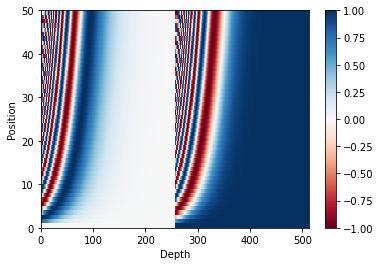

In [37]:
sample_pos_encoding = PositionalEncoding(50, 512)

plt.pcolormesh(sample_pos_encoding.pos_encoding.numpy()[0], cmap='RdBu')
plt.xlabel('Depth')
plt.xlim((0, 512))
plt.ylabel('Position')
plt.colorbar()
plt.show()

In [86]:
def scaled_dot_product_attention(query, key, value, mask):
    # query 크기 : (batch_size, num_heads, query의 문장 길이, d_model/num_heads)
    # key 크기   : (batch_size, num_heads, key의 문장 길이, d_model/num_heads)
    # value 크기 : (batch_size, num_heads, value의 문장 길이, d_model/num_heads)
    # padding_mask : (batch_size, 1, 1, key의 문장 길이)

    # Q와 K의 곱. 어텐션 스코어 행렬.
    matmul_qk = tf.matmul(query, key, transpose_b=True)  # (64,4,40,32)(64,4,32,40)
#     print('matmul_qk.shape=',matmul_qk.shape)  # (64,4,40,40)

    # 스케일링
    # dk의 루트값으로 나눠준다.
    depth = tf.cast(tf.shape(key)[-1], tf.float32)
#     print('depth=',depth)
    
    logits = matmul_qk / tf.math.sqrt(depth)
    
    print('logits=', logits)

    # 마스킹. 어텐션 스코어 행렬의 마스킹 할 위치에 매우 작은 음수값을 넣는다.
    # 매우 작은 값이므로 소프트맥스 함수를 지나면 행렬의 해당 위치의 값은 0이 된다.
    if mask is not None:
        logits += (mask * -1e9)  #  57.7 += -1000000000
        
    print('logits=', logits)

    # 소프트맥스 함수는 마지막 차원인 key의 문장 길이 방향으로 수행된다.
    # attention weight : (batch_size, num_heads, query의 문장 길이, key의 문장 길이)
    attention_weights = tf.nn.softmax(logits, axis=-1)
#     print('attention_weights.shape=', attention_weights.shape)
    
    print('attention_weights=', attention_weights)
    print('value=', value)

    # output : (batch_size, num_heads, query의 문장 길이, d_model/num_heads)
    output = tf.matmul(attention_weights, value)  # (64,4,40,40)(64,4,40,32) => (64,4,40,32)
#     print('output.shape=', output.shape)

    print('output=', output)

    return output, attention_weights

In [59]:
np.set_printoptions(suppress=True)
temp_k = tf.constant([[10,0,0],
                      [0,10,0],
                      [0,0,10],
                      [0,0,10]], dtype=tf.float32)  # (4, 3)

temp_v = tf.constant([[   1,0],
                      [  10,0],
                      [ 100,5],
                      [1000,6]], dtype=tf.float32)  # (4, 2)
temp_q = tf.constant([[0, 10, 0]], dtype=tf.float32)  # (1, 3)

In [60]:
temp_q = tf.constant([[0, 10, 0]], dtype=tf.float32)
temp_out, temp_attn = scaled_dot_product_attention(temp_q, temp_k, temp_v, None)
print(temp_attn) # 어텐션 분포(어텐션 가중치의 나열)
print(temp_out) # 어텐션 값

matmul_qk.shape= (1, 4)
tf.Tensor([[0. 1. 0. 0.]], shape=(1, 4), dtype=float32)
tf.Tensor([[10.  0.]], shape=(1, 2), dtype=float32)


In [61]:
temp_q = tf.constant([[0, 0, 10], [0, 10, 0], [10, 10, 0]], dtype=tf.float32)  # (3, 3)
temp_out, temp_attn = scaled_dot_product_attention(temp_q, temp_k, temp_v, None)
print(temp_attn) # 어텐션 분포(어텐션 가중치의 나열)
print(temp_out) # 어텐션 값

matmul_qk.shape= (3, 4)
tf.Tensor(
[[0.  0.  0.5 0.5]
 [0.  1.  0.  0. ]
 [0.5 0.5 0.  0. ]], shape=(3, 4), dtype=float32)
tf.Tensor(
[[550.    5.5]
 [ 10.    0. ]
 [  5.5   0. ]], shape=(3, 2), dtype=float32)


In [62]:
a = np.arange(24).reshape(2,3,4)
b = np.ones((4,2))
c = np.dot(a,b)   # (2,3,4)(4,2) => (2,3,2)
print(c)

[[[ 6.  6.]
  [22. 22.]
  [38. 38.]]

 [[54. 54.]
  [70. 70.]
  [86. 86.]]]


In [63]:
a = tf.constant(np.arange(24).reshape(2,2,2,3), dtype=tf.float32)
b = tf.ones((2,2,2,3))

c = tf.matmul(a, b, transpose_b=True)
print(c)

tf.Tensor(
[[[[ 3.  3.]
   [12. 12.]]

  [[21. 21.]
   [30. 30.]]]


 [[[39. 39.]
   [48. 48.]]

  [[57. 57.]
   [66. 66.]]]], shape=(2, 2, 2, 2), dtype=float32)


In [87]:
class MultiHeadAttention(tf.keras.layers.Layer):

    def __init__(self, d_model, num_heads, name="multi_head_attention"):
        super(MultiHeadAttention, self).__init__(name=name)
        self.num_heads = num_heads
        self.d_model = d_model

        assert d_model % self.num_heads == 0

        # d_model을 num_heads로 나눈 값.
        # 논문 기준 : 64
        self.depth = d_model // self.num_heads
#         print("self.depth=",self.depth)

        # WQ, WK, WV에 해당하는 밀집층 정의
        self.query_dense = tf.keras.layers.Dense(units=d_model)  # (2,512)(512, 512) => (2, 512)
        self.key_dense = tf.keras.layers.Dense(units=d_model)
        self.value_dense = tf.keras.layers.Dense(units=d_model)
        
#         print("self.query_dense.weights=",self.query_dense.weights)

        # WO에 해당하는 밀집층 정의
        self.dense = tf.keras.layers.Dense(units=d_model)

  # num_heads 개수만큼 q, k, v를 split하는 함수
    def split_heads(self, inputs, batch_size):
        inputs = tf.reshape(
            inputs, shape=(batch_size, -1, self.num_heads, self.depth))  # (64,40,128)=>(64,40,4,32)
        return tf.transpose(inputs, perm=[0, 2, 1, 3])   # (64,40,4,32)=>(64,4,40,32)

    def call(self, inputs):
        query, key, value, mask = inputs['query'], inputs['key'], inputs[
            'value'], inputs['mask']
        
#         print(query.shape)
        batch_size = tf.shape(query)[0]

#         print("batch_size=",batch_size)
        # 1. WQ, WK, WV에 해당하는 밀집층 지나기
        # q : (batch_size, query의 문장 길이, d_model)
        # k : (batch_size, key의 문장 길이, d_model)
        # v : (batch_size, value의 문장 길이, d_model)
        # 참고) 인코더(k, v)-디코더(q) 어텐션에서는 query 길이와 key, value의 길이는 다를 수 있다.
        query = self.query_dense(query)  # (64,40,128)(128,128) => (64,40,128)
        key = self.key_dense(key)
        value = self.value_dense(value)
        
#         print('query.shape=',query.shape)
        
#         print("wq.shape=",self.query_dense.weights[0].shape)  # (128,128)

        # 2. 헤드 나누기
        # q : (batch_size, num_heads, query의 문장 길이, d_model/num_heads)
        # k : (batch_size, num_heads, key의 문장 길이, d_model/num_heads)
        # v : (batch_size, num_heads, value의 문장 길이, d_model/num_heads)
        query = self.split_heads(query, batch_size)
        key = self.split_heads(key, batch_size)
        value = self.split_heads(value, batch_size)
        
#         print("query.shape=",query.shape)   # (64,4,40,32)

        # 3. 스케일드 닷 프로덕트 어텐션. 앞서 구현한 함수 사용.
        # (batch_size, num_heads, query의 문장 길이, d_model/num_heads)
        scaled_attention, _ = scaled_dot_product_attention(query, key, value, mask)
#         print("scaled_attention.shape=",scaled_attention.shape)  # (64,4,40,32)
        
        # (batch_size, query의 문장 길이, num_heads, d_model/num_heads)
        scaled_attention = tf.transpose(scaled_attention, perm=[0, 2, 1, 3])
#         print("scaled_attention.shape=",scaled_attention.shape)   # (64,40,4,32)
            
        # 4. 헤드 연결(concatenate)하기
        # (batch_size, query의 문장 길이, d_model)
        concat_attention = tf.reshape(scaled_attention,
                                  (batch_size, -1, self.d_model))
#         print("concat_attention.shape=",concat_attention.shape)   # (64,40,128)

        # 5. WO에 해당하는 밀집층 지나기
        # (batch_size, query의 문장 길이, d_model)
        outputs = self.dense(concat_attention)  # (64,40,128)(128,128) => (64,40,128)

        return outputs

In [76]:
a = np.arange(4).reshape(2,2)
print(a)
b = np.ones((2,2))
print(b)
c = np.matmul(a,b)
print(c)

[[0 1]
 [2 3]]
[[1. 1.]
 [1. 1.]]
[[1. 1.]
 [5. 5.]]


In [77]:
a = np.arange(8).reshape(2,2,2)
print(a)
b = np.ones((2,2))
print(b)
c = np.matmul(a,b)
print(c)

[[[0 1]
  [2 3]]

 [[4 5]
  [6 7]]]
[[1. 1.]
 [1. 1.]]
[[[ 1.  1.]
  [ 5.  5.]]

 [[ 9.  9.]
  [13. 13.]]]


In [78]:
a = tf.constant(np.arange(24).reshape(2,2,2,3), dtype=tf.float32)
b = tf.ones((2,2,2,3))

c = tf.matmul(a, b, transpose_b=True)
print(c)

tf.Tensor(
[[[[ 3.  3.]
   [12. 12.]]

  [[21. 21.]
   [30. 30.]]]


 [[[39. 39.]
   [48. 48.]]

  [[57. 57.]
   [66. 66.]]]], shape=(2, 2, 2, 2), dtype=float32)


In [73]:
mha = MultiHeadAttention(128,4)
x_train = tf.ones((64,40,128)) # (N,T,D)
x = { 'query':x_train,'key':x_train,'value':x_train, 'mask':None}
outputs = mha(x)
print("outputs.shape=",outputs.shape)

outputs.shape= (64, 40, 128)


In [81]:
def create_padding_mask(x):
    mask = tf.cast(tf.math.equal(x, 0), tf.float32)  # [[0,0,0,1,1]] (1,5)
    # (batch_size, 1, 1, key의 문장 길이)
    return mask[:, tf.newaxis, tf.newaxis, :]    # [[[[0,0,0,1,1]]]]   (1,1,1,5)

In [82]:
print(create_padding_mask(tf.constant([[1, 21, 777, 0, 0]])))  # (N,T) => (1,5)

tf.Tensor([[[[0. 0. 0. 1. 1.]]]], shape=(1, 1, 1, 5), dtype=float32)


In [89]:
mha = MultiHeadAttention(8,2)
x_train = tf.ones((1,5,8))
mask = create_padding_mask(tf.constant([[1, 21, 777, 33, 22]]))
x = { 'query':x_train,'key':x_train,'value':x_train, 'mask':mask}
outputs = mha(x)
print("outputs.shape=",outputs.shape)

logits= tf.Tensor(
[[[[ 0.2865792   0.2865792   0.2865792   0.2865792   0.2865792 ]
   [ 0.2865792   0.2865792   0.2865792   0.2865792   0.2865792 ]
   [ 0.2865792   0.2865792   0.2865792   0.2865792   0.2865792 ]
   [ 0.2865792   0.2865792   0.2865792   0.2865792   0.2865792 ]
   [ 0.2865792   0.2865792   0.2865792   0.2865792   0.2865792 ]]

  [[-0.16200161 -0.16200161 -0.16200161 -0.16200161 -0.16200161]
   [-0.16200161 -0.16200161 -0.16200161 -0.16200161 -0.16200161]
   [-0.16200161 -0.16200161 -0.16200161 -0.16200161 -0.16200161]
   [-0.16200161 -0.16200161 -0.16200161 -0.16200161 -0.16200161]
   [-0.16200161 -0.16200161 -0.16200161 -0.16200161 -0.16200161]]]], shape=(1, 2, 5, 5), dtype=float32)
logits= tf.Tensor(
[[[[ 0.2865792   0.2865792   0.2865792   0.2865792   0.2865792 ]
   [ 0.2865792   0.2865792   0.2865792   0.2865792   0.2865792 ]
   [ 0.2865792   0.2865792   0.2865792   0.2865792   0.2865792 ]
   [ 0.2865792   0.2865792   0.2865792   0.2865792   0.2865792 ]
   [ 0.2865

In [ ]:
def encoder_layer(dff, d_model, num_heads, dropout, name="encoder_layer"):
    inputs = tf.keras.Input(shape=(None, d_model), name="inputs")

    # 인코더는 패딩 마스크 사용
    padding_mask = tf.keras.Input(shape=(1, 1, None), name="padding_mask")

    # 멀티-헤드 어텐션 (첫번째 서브층 / 셀프 어텐션)
    attention = MultiHeadAttention(
        d_model, num_heads, name="attention")({
            'query': inputs, 'key': inputs, 'value': inputs, # Q = K = V
            'mask': padding_mask # 패딩 마스크 사용
        })

    # 드롭아웃 + 잔차 연결과 층 정규화
    attention = tf.keras.layers.Dropout(rate=dropout)(attention)
    attention = tf.keras.layers.LayerNormalization(
        epsilon=1e-6)(inputs + attention)  #   # (64,40,128)+(64,40,128)

    # 포지션 와이즈 피드 포워드 신경망 (두번째 서브층)
    outputs = tf.keras.layers.Dense(units=dff, activation='relu')(attention)  # (64,40,128)(128,512)
    outputs = tf.keras.layers.Dense(units=d_model)(outputs)                   # (64,40,512)(512,128)
                                                                              # (64,40,128)

    # 드롭아웃 + 잔차 연결과 층 정규화
    outputs = tf.keras.layers.Dropout(rate=dropout)(outputs)
    outputs = tf.keras.layers.LayerNormalization(
        epsilon=1e-6)(attention + outputs)                                    # (64,40,128)

    return tf.keras.Model(
        inputs=[inputs, padding_mask], outputs=outputs, name=name)

In [ ]:
def encoder(vocab_size, num_layers, dff,
            d_model, num_heads, dropout,
            name="encoder"):
    inputs = tf.keras.Input(shape=(None,), name="inputs")    # (64,40)

    # 인코더는 패딩 마스크 사용
    padding_mask = tf.keras.Input(shape=(1, 1, None), name="padding_mask")

    # 포지셔널 인코딩 + 드롭아웃
    embeddings = tf.keras.layers.Embedding(vocab_size, d_model)(inputs)   # (64,40)=>(64,40,128)
    embeddings *= tf.math.sqrt(tf.cast(d_model, tf.float32))
    embeddings = PositionalEncoding(vocab_size, d_model)(embeddings) # (64,40,128)+(64,40,128)
    outputs = tf.keras.layers.Dropout(rate=dropout)(embeddings)

    # 인코더를 num_layers개 쌓기
    for i in range(num_layers):
      outputs = encoder_layer(dff=dff, d_model=d_model, num_heads=num_heads,       # (64,40,128)
          dropout=dropout, name="encoder_layer_{}".format(i),
      )([outputs, padding_mask])

    return tf.keras.Model(
        inputs=[inputs, padding_mask], outputs=outputs, name=name)

In [ ]:
seq_len = 5
look_ahead_mask = tf.ones((seq_len, seq_len))
print(look_ahead_mask)
look_ahead_mask = 1 - tf.linalg.band_part(look_ahead_mask, -1, 0)
print(look_ahead_mask)

In [ ]:
def create_look_ahead_mask(x):
    seq_len = tf.shape(x)[1]
    #look_ahead_mask = tf.ones((seq_len, seq_len))
    #look_ahead_mask = tf.linalg.band_part(tf.ones((seq_len, seq_len)), -1, 0)
    look_ahead_mask = 1 - tf.linalg.band_part(tf.ones((seq_len, seq_len)), -1, 0) # (5,5)
    padding_mask = create_padding_mask(x) # 패딩 마스크도 포함  # (1,1,1,5)
    return tf.maximum(look_ahead_mask, padding_mask) # (5,5)>(1,1,1,5) => (1,1,5,5)>(1,1,5,5)
#    return look_ahead_mask

In [ ]:
print(create_look_ahead_mask(tf.constant([[4, 1, 3, 0, 0]])))  # (1,5)

In [ ]:
def decoder_layer(dff, d_model, num_heads, dropout, name="decoder_layer"):
    inputs = tf.keras.Input(shape=(None, d_model), name="inputs")
    enc_outputs = tf.keras.Input(shape=(None, d_model), name="encoder_outputs")

    # 디코더는 룩어헤드 마스크(첫번째 서브층)와 패딩 마스크(두번째 서브층) 둘 다 사용.
    look_ahead_mask = tf.keras.Input(
        shape=(1, None, None), name="look_ahead_mask")
    padding_mask = tf.keras.Input(shape=(1, 1, None), name='padding_mask')

    # 멀티-헤드 어텐션 (첫번째 서브층 / 마스크드 셀프 어텐션)
    attention1 = MultiHeadAttention(
        d_model, num_heads, name="attention_1")(inputs={
            'query': inputs, 'key': inputs, 'value': inputs, # Q = K = V
            'mask': look_ahead_mask # 룩어헤드 마스크
        })

    # 잔차 연결과 층 정규화
    attention1 = tf.keras.layers.LayerNormalization(
        epsilon=1e-6)(attention1 + inputs)

    # 멀티-헤드 어텐션 (두번째 서브층 / 디코더-인코더 어텐션)
    attention2 = MultiHeadAttention(
        d_model, num_heads, name="attention_2")(inputs={
            'query': attention1, 'key': enc_outputs, 'value': enc_outputs, # Q != K = V
            'mask': padding_mask # 패딩 마스크
        })

    # 드롭아웃 + 잔차 연결과 층 정규화
    attention2 = tf.keras.layers.Dropout(rate=dropout)(attention2)
    attention2 = tf.keras.layers.LayerNormalization(
        epsilon=1e-6)(attention2 + attention1)

    # 포지션 와이즈 피드 포워드 신경망 (세번째 서브층)
    outputs = tf.keras.layers.Dense(units=dff, activation='relu')(attention2)
    outputs = tf.keras.layers.Dense(units=d_model)(outputs)

    # 드롭아웃 + 잔차 연결과 층 정규화
    outputs = tf.keras.layers.Dropout(rate=dropout)(outputs)
    outputs = tf.keras.layers.LayerNormalization(
        epsilon=1e-6)(outputs + attention2)

    return tf.keras.Model(
        inputs=[inputs, enc_outputs, look_ahead_mask, padding_mask],
        outputs=outputs,
        name=name)

In [ ]:
def decoder(vocab_size, num_layers, dff,
            d_model, num_heads, dropout,
            name='decoder'):
    inputs = tf.keras.Input(shape=(None,), name='inputs')
    enc_outputs = tf.keras.Input(shape=(None, d_model), name='encoder_outputs')

    # 디코더는 룩어헤드 마스크(첫번째 서브층)와 패딩 마스크(두번째 서브층) 둘 다 사용.
    look_ahead_mask = tf.keras.Input(
        shape=(1, None, None), name='look_ahead_mask')
    padding_mask = tf.keras.Input(shape=(1, 1, None), name='padding_mask')

    # 포지셔널 인코딩 + 드롭아웃
    embeddings = tf.keras.layers.Embedding(vocab_size, d_model)(inputs)
    embeddings *= tf.math.sqrt(tf.cast(d_model, tf.float32))
    embeddings = PositionalEncoding(vocab_size, d_model)(embeddings)
    outputs = tf.keras.layers.Dropout(rate=dropout)(embeddings)

    # 디코더를 num_layers개 쌓기
    for i in range(num_layers):
        outputs = decoder_layer(dff=dff, d_model=d_model, num_heads=num_heads,
            dropout=dropout, name='decoder_layer_{}'.format(i),
        )(inputs=[outputs, enc_outputs, look_ahead_mask, padding_mask])

    return tf.keras.Model(
        inputs=[inputs, enc_outputs, look_ahead_mask, padding_mask],
        outputs=outputs,
        name=name)

In [ ]:
def transformer(vocab_size, num_layers, dff,
                  d_model, num_heads, dropout,
                  name="transformer"):

    # 인코더의 입력
    inputs = tf.keras.Input(shape=(None,), name="inputs")

    # 디코더의 입력
    dec_inputs = tf.keras.Input(shape=(None,), name="dec_inputs")

    # 인코더의 패딩 마스크
    enc_padding_mask = tf.keras.layers.Lambda(
        create_padding_mask, output_shape=(1, 1, None),
        name='enc_padding_mask')(inputs)

    # 디코더의 룩어헤드 마스크(첫번째 서브층)
    look_ahead_mask = tf.keras.layers.Lambda(
        create_look_ahead_mask, output_shape=(1, None, None),
        name='look_ahead_mask')(dec_inputs)

    # 디코더의 패딩 마스크(두번째 서브층)
    dec_padding_mask = tf.keras.layers.Lambda(
        create_padding_mask, output_shape=(1, 1, None),
        name='dec_padding_mask')(inputs)

    # 인코더의 출력은 enc_outputs. 디코더로 전달된다.
    enc_outputs = encoder(vocab_size=vocab_size, num_layers=num_layers, dff=dff,
        d_model=d_model, num_heads=num_heads, dropout=dropout,
    )(inputs=[inputs, enc_padding_mask]) # 인코더의 입력은 입력 문장과 패딩 마스크

    # 디코더의 출력은 dec_outputs. 출력층으로 전달된다.
    dec_outputs = decoder(vocab_size=vocab_size, num_layers=num_layers, dff=dff,
        d_model=d_model, num_heads=num_heads, dropout=dropout,
    )(inputs=[dec_inputs, enc_outputs, look_ahead_mask, dec_padding_mask])

    # 다음 단어 예측을 위한 출력층
    outputs = tf.keras.layers.Dense(units=vocab_size, name="outputs")(dec_outputs) # (N,T,D)(D,V)

    return tf.keras.Model(inputs=[inputs, dec_inputs], outputs=outputs, name=name)

In [ ]:
small_transformer = transformer(
    vocab_size = 9000,
    num_layers = 4,
    dff = 512,
    d_model = 128,
    num_heads = 4,
    dropout = 0.3,
    name="small_transformer")

tf.keras.utils.plot_model(
    small_transformer, to_file='small_transformer.png', show_shapes=True)

In [ ]:
def loss_function(y_true, y_pred):
    y_true = tf.reshape(y_true, shape=(-1, MAX_LENGTH - 1))

    loss = tf.keras.losses.SparseCategoricalCrossentropy(
        from_logits=True, reduction='none')(y_true, y_pred)

    mask = tf.cast(tf.not_equal(y_true, 0), tf.float32)
    loss = tf.multiply(loss, mask)

    return tf.reduce_mean(loss)

In [ ]:
class CustomSchedule(tf.keras.optimizers.schedules.LearningRateSchedule):

    def __init__(self, d_model, warmup_steps=4000):
        super(CustomSchedule, self).__init__()
        self.d_model = d_model
        self.d_model = tf.cast(self.d_model, tf.float32)
        self.warmup_steps = warmup_steps

    def __call__(self, step):
        arg1 = tf.math.rsqrt(step)
        arg2 = step * (self.warmup_steps**-1.5)

        return tf.math.rsqrt(self.d_model) * tf.math.minimum(arg1, arg2)
sample_learning_rate = CustomSchedule(d_model=128)

plt.plot(sample_learning_rate(tf.range(200000, dtype=tf.float32)))
plt.ylabel("Learning Rate")
plt.xlabel("Train Step")
# Text(0.5, 0, 'Train Step')

#### tensorflow_datasets 처음 설치 시

In [ ]:
!pip install tensorflow_datasets 

#### tensorflow_datasets 업그레이드 시

In [ ]:
!pip3 install --user --upgrade tensorflow_datasets

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import urllib.request
import time
import tensorflow_datasets as tfds
import tensorflow as tf

In [ ]:
print(tf.__version__)

In [ ]:
print(tfds.__version__)

In [ ]:
# urllib.request.urlretrieve("https://raw.githubusercontent.com/songys/Chatbot_data/master/ChatbotData%20.csv", filename="ChatBotData.csv")
train_data = pd.read_csv('ChatBotData.csv')
train_data.head()

In [ ]:
print('챗봇 샘플의 개수 :', len(train_data))

In [ ]:
print(train_data.isnull().sum())

In [ ]:
questions = []
for sentence in train_data['Q']:
    # 구두점에 대해서 띄어쓰기
    # ex) 12시 땡! -> 12시 땡 !
    sentence = re.sub(r"([?.!,])", r" \1 ", sentence)
    sentence = sentence.strip()
    questions.append(sentence)
answers = []
for sentence in train_data['A']:
    # 구두점에 대해서 띄어쓰기
    # ex) 12시 땡! -> 12시 땡 !
    sentence = re.sub(r"([?.!,])", r" \1 ", sentence)
    sentence = sentence.strip()
    answers.append(sentence)

In [ ]:
print(questions[:5])
print(answers[:5])

In [ ]:
# 서브워드텍스트인코더를 사용하여 질문, 답변 데이터로부터 단어 집합(Vocabulary) 생성
tokenizer = tfds.deprecated.text.SubwordTextEncoder.build_from_corpus(
    questions + answers, target_vocab_size=2**13)

In [ ]:
# 시작 토큰과 종료 토큰에 대한 정수 부여.
START_TOKEN, END_TOKEN = [tokenizer.vocab_size], [tokenizer.vocab_size + 1]

# 시작 토큰과 종료 토큰을 고려하여 단어 집합의 크기를 + 2
VOCAB_SIZE = tokenizer.vocab_size + 2

In [ ]:
print('시작 토큰 번호 :',START_TOKEN)
print('종료 토큰 번호 :',END_TOKEN)
print('단어 집합의 크기 :',VOCAB_SIZE)

In [ ]:
# 서브워드텍스트인코더 토크나이저의 .encode()를 사용하여 텍스트 시퀀스를 정수 시퀀스로 변환.
print('임의의 질문 샘플을 정수 인코딩 : {}'.format(tokenizer.encode(questions[20])))

In [ ]:
# 서브워드텍스트인코더 토크나이저의 .encode()와 .decode() 테스트해보기
# 임의의 입력 문장을 sample_string에 저장
sample_string = questions[20]

# encode() : 텍스트 시퀀스 --> 정수 시퀀스
tokenized_string = tokenizer.encode(sample_string)
print ('정수 인코딩 후의 문장 {}'.format(tokenized_string))

# decode() : 정수 시퀀스 --> 텍스트 시퀀스
original_string = tokenizer.decode(tokenized_string)
print ('기존 문장: {}'.format(original_string))

In [ ]:
for ts in tokenized_string:
    print ('{} ----> {}'.format(ts, tokenizer.decode([ts])))

In [ ]:
# 최대 길이를 40으로 정의
MAX_LENGTH = 40

# 토큰화 / 정수 인코딩 / 시작 토큰과 종료 토큰 추가 / 패딩
def tokenize_and_filter(inputs, outputs):
  tokenized_inputs, tokenized_outputs = [], []

  for (sentence1, sentence2) in zip(inputs, outputs):
    # encode(토큰화 + 정수 인코딩), 시작 토큰과 종료 토큰 추가
    sentence1 = START_TOKEN + tokenizer.encode(sentence1) + END_TOKEN
    sentence2 = START_TOKEN + tokenizer.encode(sentence2) + END_TOKEN

    tokenized_inputs.append(sentence1)
    tokenized_outputs.append(sentence2)

  # 패딩
  tokenized_inputs = tf.keras.preprocessing.sequence.pad_sequences(
      tokenized_inputs, maxlen=MAX_LENGTH, padding='post')
  tokenized_outputs = tf.keras.preprocessing.sequence.pad_sequences(
      tokenized_outputs, maxlen=MAX_LENGTH, padding='post')

  return tokenized_inputs, tokenized_outputs
questions, answers = tokenize_and_filter(questions, answers)

In [ ]:
print('질문 데이터의 크기(shape) :', questions.shape)
print('답변 데이터의 크기(shape) :', answers.shape)

In [ ]:
print(questions[0])
print(answers[0])

In [ ]:
BATCH_SIZE = 64
BUFFER_SIZE = 20000

# 디코더의 실제값 시퀀스에서는 시작 토큰을 제거해야 한다.
dataset = tf.data.Dataset.from_tensor_slices((
    {
        'inputs': questions,
        'dec_inputs': answers[:, :-1] # 디코더의 입력. 마지막 패딩 토큰이 제거된다.
    },
    {
        'outputs': answers[:, 1:]  # 맨 처음 토큰이 제거된다. 다시 말해 시작 토큰이 제거된다.
    },
))

dataset = dataset.cache()
dataset = dataset.shuffle(BUFFER_SIZE)
dataset = dataset.batch(BATCH_SIZE)
dataset = dataset.prefetch(tf.data.experimental.AUTOTUNE)
# 임의의 샘플에 대해서 [:, :-1]과 [:, 1:]이 어떤 의미를 가지는지 테스트해본다.
print(answers[0]) # 기존 샘플
print(answers[:1][:, :-1]) # 마지막 패딩 토큰 제거하면서 길이가 39가 된다.
print(answers[:1][:, 1:]) # 맨 처음 토큰이 제거된다. 다시 말해 시작 토큰이 제거된다. 길이는 역시 39가 된다.

In [ ]:
D_MODEL = 256
NUM_LAYERS = 2
NUM_HEADS = 8
DFF = 512
DROPOUT = 0.1

model = transformer(
    vocab_size=VOCAB_SIZE,
    num_layers=NUM_LAYERS,
    dff=DFF,
    d_model=D_MODEL,
    num_heads=NUM_HEADS,
    dropout=DROPOUT)

In [ ]:
learning_rate = CustomSchedule(D_MODEL)

optimizer = tf.keras.optimizers.Adam(
    learning_rate, beta_1=0.9, beta_2=0.98, epsilon=1e-9)

def accuracy(y_true, y_pred):
  # 레이블의 크기는 (batch_size, MAX_LENGTH - 1)
  y_true = tf.reshape(y_true, shape=(-1, MAX_LENGTH - 1))
  return tf.keras.metrics.sparse_categorical_accuracy(y_true, y_pred)

model.compile(optimizer=optimizer, loss=loss_function, metrics=[accuracy])

In [ ]:
EPOCHS = 50
model.fit(dataset, epochs=EPOCHS)

In [ ]:
def evaluate(sentence):
  sentence = preprocess_sentence(sentence)

  sentence = tf.expand_dims(
      START_TOKEN + tokenizer.encode(sentence) + END_TOKEN, axis=0)

  output = tf.expand_dims(START_TOKEN, 0)

  # 디코더의 예측 시작
  for i in range(MAX_LENGTH):
    predictions = model(inputs=[sentence, output], training=False)

    # 현재(마지막) 시점의 예측 단어를 받아온다.
    predictions = predictions[:, -1:, :]
    predicted_id = tf.cast(tf.argmax(predictions, axis=-1), tf.int32)

    # 만약 마지막 시점의 예측 단어가 종료 토큰이라면 예측을 중단
    if tf.equal(predicted_id, END_TOKEN[0]):
      break

    # 마지막 시점의 예측 단어를 출력에 연결한다.
    # 이는 for문을 통해서 디코더의 입력으로 사용될 예정이다.
    output = tf.concat([output, predicted_id], axis=-1)

  return tf.squeeze(output, axis=0)
def predict(sentence):
  prediction = evaluate(sentence)

  predicted_sentence = tokenizer.decode(
      [i for i in prediction if i < tokenizer.vocab_size])

  print('Input: {}'.format(sentence))
  print('Output: {}'.format(predicted_sentence))

  return predicted_sentence
def preprocess_sentence(sentence):
  sentence = re.sub(r"([?.!,])", r" \1 ", sentence)
  sentence = sentence.strip()
  return sentence

In [ ]:
output = predict("날씨가 좋넹.")

In [ ]:
output = predict("고민이 있어")

In [ ]:
output = predict("너무 화가나")

In [ ]:
output = predict("카페갈래?")

In [ ]:
output = predict("게임하고싶당")

In [ ]:
output = predict("게임하자")